In [1]:
from pyntcloud import PyntCloud
import plotly
plotly.tools.set_credentials_file(username='BenediktDietz', api_key='ONDJ6jrZjXyzvoLast7e')
import plotly.plotly as py
import numpy as np
import matplotlib.cm as cm
from scipy.spatial import Delaunay
import plotly.figure_factory as FF
from plotly.graph_objs import graph_objs


import argparse
import sys
import os
from PIL import Image

focalLength = 463.0
centerX = 320.0
centerY = 240.0
scalingFactor = 1000.0

def generate_pointcloud(rgb_file,depth_file,ply_file):
    """
    Generate a colored point cloud in PLY format from a color and a depth image.
    
    Input:
    rgb_file -- filename of color image
    depth_file -- filename of depth image
    ply_file -- filename of ply file
    
    """
    rgb = Image.open(rgb_file)
    depth = Image.open(depth_file)
    
    if rgb.size != depth.size:
        raise Exception("Color and depth image do not have the same resolution.")
    if rgb.mode != "RGB":
        raise Exception("Color image is not in RGB format")
    if depth.mode != "I":
        raise Exception("Depth image is not in intensity format")


    points = []    
    for v in range(rgb.size[1]):
        for u in range(rgb.size[0]):
            color = rgb.getpixel((u,v))
            Z = depth.getpixel((u,v)) / scalingFactor
            if Z==0: continue
            X = (u - centerX) * Z / focalLength
            Y = (v - centerY) * Z / focalLength
            points.append("%f %f %f %d %d %d\n"%(X,Y,Z,color[0],color[1],color[2]))
            #points.append("%f %f %f \n"%(X,Y,Z))
    
    file = open(ply_file,"w")
    file.write('''ply
format ascii 1.0
element vertex %d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
%s
'''%(len(points),"".join(points)))
    file.close()
    

    
generate_pointcloud('frame-000000.color.png', 'frame-000000.depth.png', 'pctest.ply')


cloud = PyntCloud.from_file("pctest.ply")

cloud.add_scalar_field("hsv")

voxelgrid_id = cloud.add_structure("voxelgrid", x_y_z=[32, 32, 32])

points = cloud.get_sample("voxelgrid_nearest", voxelgrid=voxelgrid_id)

new_cloud = PyntCloud(points)

/home/drzadmin/anaconda3/lib/python3.6/site-packages/pyntcloud/scalar_fields/sf_rgb.py:44: RuntimeWarning:

invalid value encountered in true_divide

/home/drzadmin/anaconda3/lib/python3.6/site-packages/pyntcloud/scalar_fields/sf_rgb.py:48: RuntimeWarning:

invalid value encountered in true_divide

/home/drzadmin/anaconda3/lib/python3.6/site-packages/pyntcloud/scalar_fields/sf_rgb.py:51: RuntimeWarning:

invalid value encountered in true_divide

/home/drzadmin/anaconda3/lib/python3.6/site-packages/pyntcloud/scalar_fields/sf_rgb.py:55: RuntimeWarning:

invalid value encountered in true_divide



In [2]:
new_cloud.plot()

In [3]:
new_cloud.points

,x,y,z,red,green,blue,H,S,V
0,-4.759039,-1.897495,7.085,12,14,8,80.000000,0.428571,5.490196
1,-4.450279,-2.161158,6.583,9,12,7,96.000000,0.416667,4.705883
2,-4.529553,-2.198812,6.787,6,8,4,90.000000,0.500000,3.137255
3,-4.303186,-2.253305,7.245,2,3,2,120.000000,0.333333,1.176471
4,-4.343153,-1.954419,6.284,23,30,18,95.000000,0.400000,11.764706
5,-4.466503,-2.054877,6.607,13,16,9,85.714287,0.437500,6.274510
6,-4.383931,-1.739873,6.343,23,30,17,92.307693,0.433333,11.764706
7,-4.161499,-3.520121,6.906,21,27,16,92.727272,0.407407,10.588236
8,-4.164512,-3.388330,6.911,56,59,53,90.000000,0.101695,23.137255
9,-4.183382,-3.374188,7.069,40,44,22,70.909088,0.500000,17.254902


In [4]:
(np.max(new_cloud.points.x) - np.min(new_cloud.points.x)) * (np.max(new_cloud.points.y) - np.min(new_cloud.points.y)) * (np.max(new_cloud.points.z) - np.min(new_cloud.points.z)) 

294.0517

In [5]:
import test_dataloaderBD

In [6]:
samples1, samples2, samples3 = test_dataloaderBD.main()

checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30

checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30

0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19

0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pas

0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pass
checkpoint4 pass
checkpoint5 pass
checkpoint6 pass
checkpoint7 pass
checkpoint8 pass
checkpoint9 pass
checkpoint10 pass
checkpoint11 pass
checkpoint12 pass
checkpoint13 pass
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.169749243266
(1, 30, 30, 30)
checkpoint14 pass
checkpoint15 pass
checkpoint16 pass
checkpoint17 pass
checkpoint18 pass
checkpoint19 pass
0.397714580466
(1, 30, 30, 30)
checkpoint1 pass
checkpoint2 pass
checkpoint3 pas

In [10]:
np.array(samples1).shape

(64, 1, 30, 30, 30)

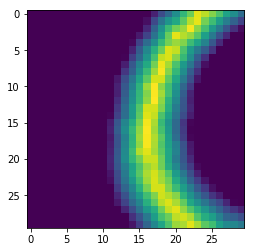

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(np.array(samples3)[0,0,:,10,:])

In [8]:
np.array(samples2).shape

(64, 1, 30, 30, 30)

In [31]:
np.array(samples3).shape

(64, 1, 30, 30, 30)

In [32]:
## where is the colour coding?